# Gaussian process regression, GPR



1. 콜레스키 분해
![콜레스키](./assets/콜레스키.png)

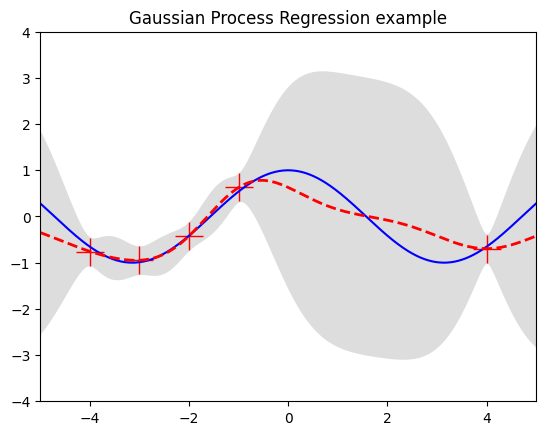

In [3]:
# GP regression example
# by st.watermelon

import numpy as np
import matplotlib.pyplot as plt


# kernel
def kernel(a, b):
    lam2 = 1
    sqdist = np.sum(a**2, 1).reshape(-1, 1) + np.sum(b**2, 1) - 2 * np.dot(a, b.T)
    return np.exp(-0.5 * sqdist / lam2)


# true function
def true_f(x):
    return np.cos(x).flatten()


# parameters
p = 500  # number of test points
s = 0.1  # noise std

# training points (given)
X = np.array([[-4], [-3], [-2], [-1], [4]])
train_count = X.shape[0]  # number of training points
y_real = true_f(X) + s * np.random.randn(train_count)  # (m,)

K = kernel(X, X)
L = np.linalg.cholesky(K + s**2 * np.eye(train_count))

# points for prediction
X_star = np.linspace(-5, 5, p).reshape(-1, 1)

# posterior mean (mu)
K_star = kernel(X, X_star)
L_star = np.linalg.solve(L, K_star)
mu_pos = np.dot(L_star.T, np.linalg.solve(L, y_real))

# posterior covariance
K2star = kernel(X_star, X_star)
Sig = K2star - np.dot(L_star.T, L_star)

s2 = np.diag(Sig)
s = np.sqrt(s2)

# plotting
plt.figure(1)
plt.clf()
plt.title("Gaussian Process Regression example")
plt.axis([-5, 5, -4, 4])

# Plot TRUE
## 1. Plot training points
plt.plot(X, y_real, "r+", ms=20)
## 2. Plot true function
plt.plot(X_star, true_f(X_star), "b-")

# Plot GPR
## 1. GPR Estimation area
plt.gca().fill_between(X_star.flat, mu_pos - 3 * s, mu_pos + 3 * s, color="#dddddd")
## 2. GPR function
plt.plot(X_star, mu_pos, "r--", lw=2)


# samples from the prior
# L = np.linalg.cholesky(K2star + 1e-6 * np.eye(p))
# f_prior = np.dot(L, np.random.normal(size=(p, 10)))
# plt.figure(2)
# plt.clf()
# plt.plot(Xstar, f_prior)
# plt.title("Ten samples from the GP prior")
# plt.axis([-5, 5, -4, 4])


# samples from the posterior
# L = np.linalg.cholesky(K2star + 1e-6 * np.eye(p) - np.dot(Lstar.T, Lstar))
# f_post = mu_pos.reshape(-1, 1) + np.dot(L, np.random.normal(size=(p, 10)))
# plt.figure(3)
# plt.clf()
# plt.plot(Xstar, f_post)
# plt.title("Ten samples from the GP posterior")
# plt.axis([-5, 5, -4, 4])

plt.show()

In [5]:
coord = np.array([[1, 1, 1], [2, 2, 2]])
for c in coord:
    print(c)

[1 1 1]
[2 2 2]
